### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.15.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
trainX.shape

(60000, 28, 28)

In [7]:
trainY.shape

(60000,)

In [8]:
testX.shape

(10000, 28, 28)

In [9]:
testY.shape

(10000,)

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY=tf.keras.utils.to_categorical(trainY, num_classes=10)
testY=tf.keras.utils.to_categorical(testY, num_classes=10)

In [11]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


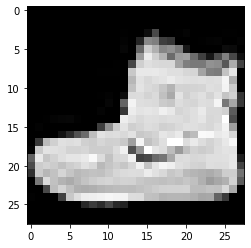

In [41]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(trainX[0],cmap='gray')
print(trainY[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


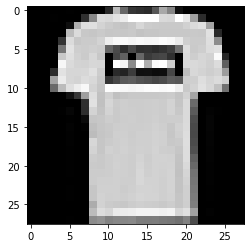

In [42]:
plt.imshow(trainX[1],cmap='gray')
print(trainY[1])

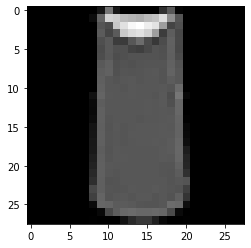

In [31]:
plt.imshow(trainX[2],cmap='gray')

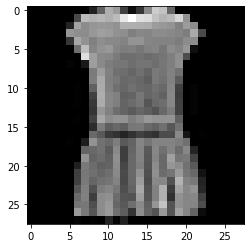

In [32]:
plt.imshow(trainX[3],cmap='gray')

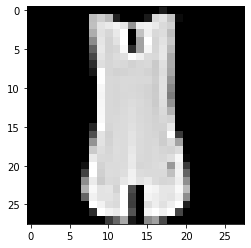

In [33]:
plt.imshow(trainX[4],cmap='gray')

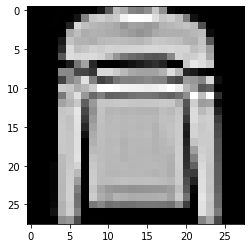

In [34]:
plt.imshow(trainX[5],cmap='gray')

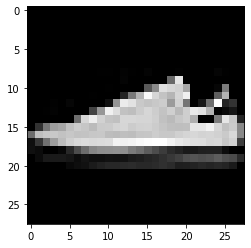

In [35]:
plt.imshow(trainX[6],cmap='gray')

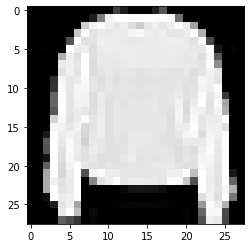

In [36]:
plt.imshow(trainX[7],cmap='gray')

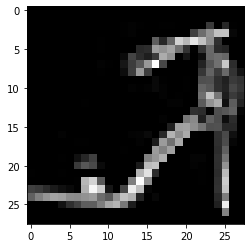

In [37]:
plt.imshow(trainX[8],cmap='gray')

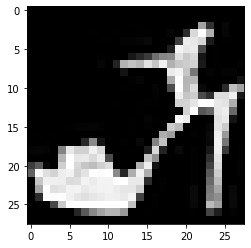

In [38]:
plt.imshow(trainX[9],cmap='gray')

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


model.add(tf.keras.layers.Dense(10, activation='softmax'))

### Execute the model using model.fit()

In [46]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 2068.2271 - acc: 0.7393 - val_loss: 1335.5547 - val_acc: 0.7518
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 1612.6862 - acc: 0.7778 - val_loss: 1055.6380 - val_acc: 0.8001
Epoch 3/5
60000/60000 [==============================] - 2s 39us/sample - loss: 1524.0026 - acc: 0.7850 - val_loss: 1140.9690 - val_acc: 0.7869
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 1493.0192 - acc: 0.7921 - val_loss: 2106.0926 - val_acc: 0.7294
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 1524.3850 - acc: 0.7910 - val_loss: 1620.0773 - val_acc: 0.7920


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])


### Execute the model

In [49]:

model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4435 - acc: 0.8461 - val_loss: 0.4730 - val_acc: 0.8369
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4391 - acc: 0.8479 - val_loss: 0.4663 - val_acc: 0.8412
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4381 - acc: 0.8478 - val_loss: 0.4587 - val_acc: 0.8394
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4311 - acc: 0.8503 - val_loss: 0.4651 - val_acc: 0.8406
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4299 - acc: 0.8497 - val_loss: 0.4622 - val_acc: 0.8383


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd=tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [54]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4441 - acc: 0.8472 - val_loss: 0.4642 - val_acc: 0.8392
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4380 - acc: 0.8471 - val_loss: 0.4784 - val_acc: 0.8379
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4357 - acc: 0.8490 - val_loss: 0.4646 - val_acc: 0.8406
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4320 - acc: 0.8497 - val_loss: 0.4588 - val_acc: 0.8417
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4289 - acc: 0.8508 - val_loss: 0.4664 - val_acc: 0.8411


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
neuralmodel = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
neuralmodel.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
neuralmodel.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add the first layer
neuralmodel.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add the second layer
neuralmodel.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add the third layer
neuralmodel.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
#Add the output layer
neuralmodel.add(tf.keras.layers.Dense(10, activation='softmax'))

## Review model

In [0]:
sgd=tf.keras.optimizers.SGD(learning_rate=0.03)
neuralmodel.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Run the model

In [63]:
neuralmodel.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=20,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/sample - loss: 1.0931 - acc: 0.6567 - val_loss: 1.0231 - val_acc: 0.6795
Epoch 2/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.9923 - acc: 0.6879 - val_loss: 0.9305 - val_acc: 0.7128
Epoch 3/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.9070 - acc: 0.7147 - val_loss: 0.8516 - val_acc: 0.7309
Epoch 4/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.8355 - acc: 0.7323 - val_loss: 0.7840 - val_acc: 0.7478
Epoch 5/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.7748 - acc: 0.7454 - val_loss: 0.7311 - val_acc: 0.7576
Epoch 6/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.7252 - acc: 0.7588 - val_loss: 0.6892 - val_acc: 0.7687
Epoch 7/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.6857 - acc: 0.7675 - val_loss: 0.